In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [10]:
def freq(lst):
    d = {}
    for i in lst:
        for j in i:
            if d.get(j):
                d[j] += 1
            else:
                d[j] = 1
    
    return d

In [11]:
def histogram(img):
    plt.hist(img.ravel(),256,[0,256]) 
    plt.plot
    plt.show() 

In [12]:
def probability(d,total_pixels):
    l = {}
    for i in range(256):
        value = d.get(i)
        if value != None:
            l[i] = value/total_pixels
#     print("probability", l)
    return l

In [13]:
def equalizer(d, l):
    f_dic = {}
    last_sum = 0
    for i in range(l):
        if d.get(i):
            prob = d.get(i)
            last_sum = last_sum+((l-1)*prob)
            f_dic[i] = math.floor(last_sum)
    return f_dic
# def equalizer(pdf, t_pixels, depth=2 ** 3):
#     print(pdf)
#     min_cdf = pdf[min(pdf)]
#     print(min_cdf)
#     result = {}
#     accumulator = 0
#     for k, v in sorted(pdf.items()):
#         accumulator += v
#         result[k] = int(round((accumulator - min_cdf) / (t_pixels - min_cdf) * (depth - 1)))
#         print(result)
#     return result

In [14]:
def replace_values(f_dic, img):
#     print(f_dic)
    for i in range(len(img)):
        for j in range(len(img)):
            vv = f_dic.get(img[i][j])
            if vv != None:
                img[i][j] = vv
    return img
            

In [15]:
def histogramEqualization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    freqq = freq(img)
    area = img.shape
    total_pixels = area[0]*area[1]
    prob = probability(freqq, total_pixels)
    f_dic = equalizer(prob,256)
    new_img = replace_values(f_dic,img)
    histogram(new_img)
    return new_img
    
    

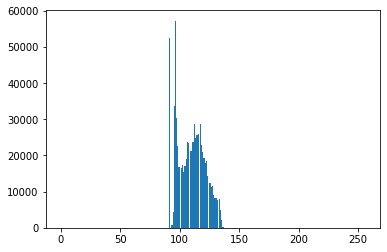

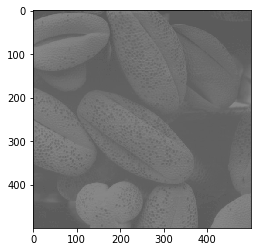

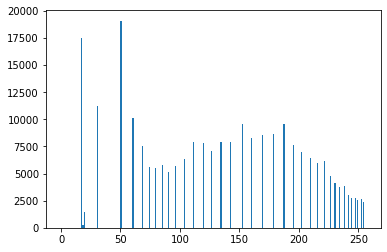

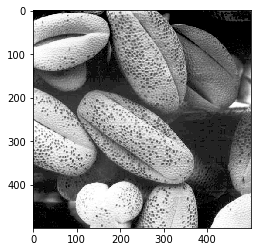

In [16]:
image = cv2.imread('/home/ahmed/Desktop/wordpress/Unequalized.jpeg',1)
pollen_dark = cv2.imread("/home/ahmed/Downloads/dip/DIP_A1_Fall2019/pollen_dark.tif")
pollen_light = cv2.imread("/home/ahmed/Downloads/dip/DIP_A1_Fall2019/pollen_light.tif")
pollen_low_contrast = cv2.imread("/home/ahmed/Downloads/dip/DIP_A1_Fall2019/pollen_low_contrast.tif")
# array1 = [1,2,1]
# array2 = [1,2,1]
# array3 = [1,3,1]
# kernal = np.array([array1,array2,array3])
histogram(pollen_low_contrast)
plt.imshow(pollen_low_contrast, cmap='gray')
plt.show()
new = histogramEqualization(pollen_low_contrast)
plt.imshow(new, cmap='gray')

In [17]:
img = pollen_low_contrast
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)

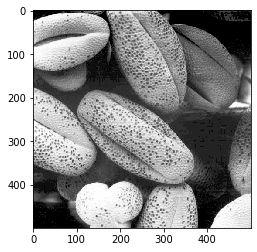

In [26]:
plt.imshow(img,cmap='gray')


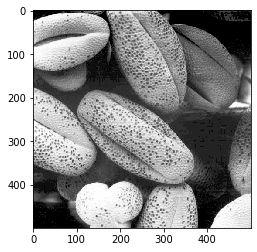

In [29]:
plt.imshow(img/220,cmap='gray')